# Multi-Class Classification

This lesson picks up where <a href="https://github.com/4igeek/TensorFlow/blob/main/Classification/NonLinearBinaryClassification.ipynb">Non-Linear Binary Classification</a> takes off. In this notebook we're going to look at solving another classification problem only this time we're going to have more than two labels (classes). The steps for solving a binary class problem are the same as the steps for solving a multi-class problem.

In this example we are going to classify images of clothing i.e. t-shirts, shoes etc. For this we're going to use the <a href="https://www.tensorflow.org/datasets/catalog/fashion_mnist" target="_blank">TensorFlow fashion MNIST</a> dataset. 

TensorFlow has a variety of datasets that we can use to practice solving certain problems. Most of the time when we're working on a problem we can use one of these "practice" datasets to come up with a model before we pass it our actual data.

## Recap of the steps for building a model
1) Prepare the data
2) Build a model
3) Fit the model to the data (and make predictions)
4) Evaluate the model
5) Improve through experimentation
6) Save the model

## Mnist Fashion Labels
| Label | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Description** | T-shirt | Trousers | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle Boot |

## 1) Prepare the data


In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data from the mnist datasets are already 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [11]:
# We can check to see what the first item is in our training dataset by checking the label (in this case 9 i.e. an Ankle Boot).
print(f"Training Label:\n{train_labels[0]}")

Training Label:
9


## Inspecting the data

We need to know what form our data is in before we can begin to build our model, that is because we need to know how many inputs our network will have.

In [12]:
## Checking the shape of a data sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

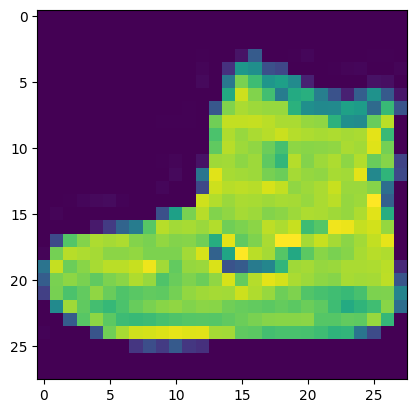

In [15]:
# Plotting a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [17]:
# Check our label is correct for the same index
train_labels[0]

9

The 9 above denotes that the item we printed was an ankle boot. A good idea would be to make this output better understandable by humans (so we don't need to keep referring to the table to see what our prediction is). 

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[train_labels[0]]

'Ankle boot'

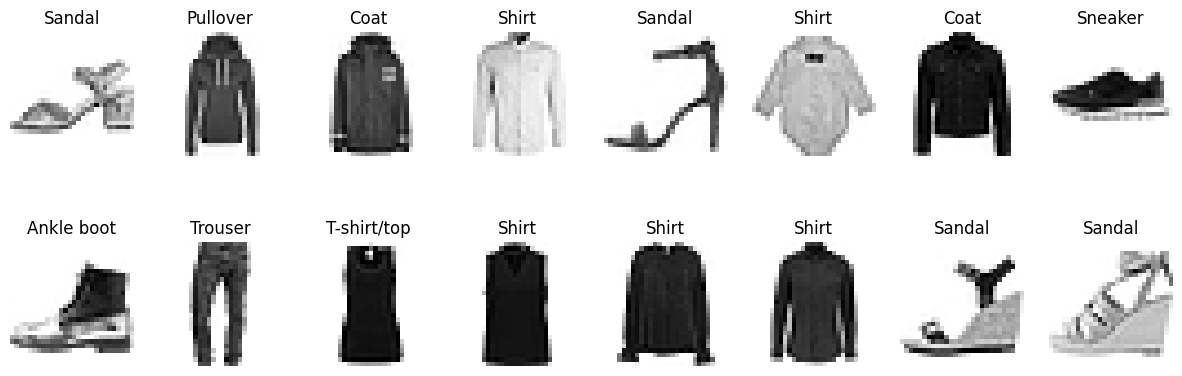

In [26]:
# Generate random number to represent an index in the dataset
import random

plt.figure(figsize=(15,5))

for i in range(16):
    ax = plt.subplot(2,8, i+1)
    random_number = random.randint(0, 60000)
    plt.imshow(train_data[random_number], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_number]])
    plt.axis(False)

## What do we know about our data?

When looking at the images above what can we say about the data? Would we be able to find solutions using nothing but straight lines or would we need some curves in there? We need to know because straight or curved lines define whether we're going to build a linear or a non-linear model. 

**It looks like we're going to include some non-linearity into our model.**

Usually at this point we would need to convert our data into tensors but this has already been done for us by TensorFlow.

## 2) Build our milti-class classification model

<table style="width:100%">
    <thead>
        <tr>
            <th>Hyperparameter</th>
            <th>Binary Classification</th>
            <th>Multiclass Classification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Input layer shape</td>
            <td colspan=2>Same as the number of features in the data</td>
        </tr>
        <tr>
            <td>Hidden layer(s)</td>
            <td colspan=2>Problem specific, minimum=1, maximum=infinity</td>
        </tr>
        <tr>
            <td>Neurons/hidden layer</td>
            <td colspan=2>Problem specific, generally 10 to 100</td>
        </tr>
        <tr>
            <td>Output layer shape</td>
            <td>One class or the other</td>
            <td>One per class</td>
        </tr>
        <tr>
            <td>Hidden activation</td>
            <td colspan=2>Usually reLU</td>
        </tr>
        <tr>
            <td>Output activation</td>
            <td>Sigmoid</td>
            <td>Softmax</td>
        </tr>
        <tr>
            <td>Loss function</td>
            <td>Binary Crossentropy</td>
            <td>Categorical Crossentropy</td>
        </tr>
        <tr>
            <td>Optimiser</td>
            <td colspan=2>SGD or Adam</td>
        </tr>
    </tbody>
</table>

We can see from the table above what "things" need to be changed when we switch from binary to multi-classification problems i.e. we use Softmax activation function on the output instead of Sigmoid etc.